In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)

2.9.1


In [3]:
raw_seda = pd.read_csv('seda_geodist_long_gcs_4.1.csv')
raw_seda = raw_seda.drop(labels=['sedaleaname','fips','stateabb','sedalea','gcs_mnse_all','gcs_mnse_asn','gcs_mnse_blk','gcs_mnse_ecd','gcs_mnse_fem','gcs_mnse_hsp','gcs_mnse_mal','gcs_mn_mfg','gcs_mnse_mfg','gcs_mn_mtr','gcs_mnse_mtr','gcs_mnse_nam','gcs_mnse_nec','gcs_mn_neg','gcs_mnse_neg','totgyb_neg','gcs_mn_wag','gcs_mnse_wag','totgyb_wag','gcs_mn_wbg','gcs_mnse_wbg','totgyb_wbg','gcs_mn_whg','gcs_mnse_whg','totgyb_whg','gcs_mnse_wht','gcs_mn_wmg','gcs_mnse_wmg','totgyb_wmg','gcs_mn_wng','gcs_mnse_wng','totgyb_wng'], axis=1)

In [4]:
raw_seda.head()

,subject,grade,year,gcs_mn_all,totgyb_all,gcs_mn_asn,totgyb_asn,gcs_mn_blk,totgyb_blk,gcs_mn_ecd,...,gcs_mn_mal,totgyb_mal,totgyb_mfg,totgyb_mtr,gcs_mn_nam,totgyb_nam,gcs_mn_nec,totgyb_nec,gcs_mn_wht,totgyb_wht
0,mth,6,2009,NaN,3.0,NaN,NaN,NaN,2.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rla,6,2009,NaN,3.0,NaN,NaN,NaN,2.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mth,6,2011,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,rla,6,2011,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,mth,7,2009,NaN,13.0,NaN,NaN,NaN,7.0,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_seda['pct_asn'] = raw_seda['totgyb_asn'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_blk'] = raw_seda['totgyb_blk'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_ecd'] = raw_seda['totgyb_ecd'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_fem'] = raw_seda['totgyb_fem'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_hsp'] = raw_seda['totgyb_hsp'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_mal'] = raw_seda['totgyb_mal'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_nam'] = raw_seda['totgyb_nam'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_nec'] = raw_seda['totgyb_nec'] / raw_seda['totgyb_all'] * 100
raw_seda['pct_wht'] = raw_seda['totgyb_wht'] / raw_seda['totgyb_all'] * 100
raw_seda = raw_seda.drop(columns=['totgyb_asn', 'totgyb_blk','totgyb_ecd','totgyb_fem','totgyb_hsp','totgyb_mal','totgyb_nam','totgyb_nec','totgyb_wht'])

In [15]:
seda = pd.DataFrame()
temp = pd.DataFrame()

temp = raw_seda[['subject','grade','year','gcs_mn_asn','pct_asn']].copy()
temp = temp.rename(columns={'gcs_mn_asn':'score','pct_asn':'cohort_pct'})
temp = temp.dropna()
temp['asian'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_blk']].copy()
temp = temp.rename(columns={'gcs_mn_blk':'score','pct_blk':'cohort_pct'})
temp = temp.dropna()
temp['african american'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_hsp']].copy()
temp = temp.rename(columns={'gcs_mn_hsp':'score','pct_hsp':'cohort_pct'})
temp = temp.dropna()
temp['hispanic'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_nam']].copy()
temp = temp.rename(columns={'gcs_mn_nam':'score','pct_nam':'cohort_pct'})
temp = temp.dropna()
temp['native american'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_wht']].copy()
temp = temp.rename(columns={'gcs_mn_wht':'score','pct_wht':'cohort_pct'})
temp = temp.dropna()
temp['white'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_ecd']].copy()
temp = temp.rename(columns={'gcs_mn_ecd':'score','pct_ecd':'cohort_pct'})
temp = temp.dropna()
temp['ECD'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_nec']].copy()
temp = temp.rename(columns={'gcs_mn_nec':'score','pct_nec':'cohort_pct'})
temp = temp.dropna()
temp['nec'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_fem']].copy()
temp = temp.rename(columns={'gcs_mn_fem':'score','pct_fem':'cohort_pct'})
temp = temp.dropna()
temp['female'] = 1

seda = pd.concat([seda, temp])

temp = raw_seda[['subject','grade','year','gcs_mn_mal']].copy()
temp = temp.rename(columns={'gcs_mn_mal':'score','pct_mal':'cohort_pct'})
temp = temp.dropna()
temp['male'] = 1

seda = pd.concat([seda, temp])

seda = seda.fillna(0)
seda['cohort_pct'] = seda['cohort_pct'].replace(to_replace=0, value=-1)
 # change cohort_pct na value to -1

seda = seda.sample(frac=1)
seda.head(5000)


,subject,grade,year,score,cohort_pct,asian,african american,hispanic,native american,white,ECD,nec,female,male
321326,rla,4,2016,5.575211,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
922993,mth,8,2015,5.983504,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
876978,mth,6,2012,5.511982,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
623248,mth,3,2015,1.964052,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
832235,rla,4,2011,4.190421,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806054,mth,6,2012,2.877418,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
569983,mth,5,2012,5.049659,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
827639,mth,8,2012,10.267212,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
242,rla,8,2012,9.315569,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
subject_dict = {'mth': 0, 'rla': 1}
seda = seda.replace({'subject': subject_dict})

In [18]:
seda = seda.head(100000)
seda.head(100000)
seda['cohort_pct'].describe()

count    100000.000000
mean         -0.736935
std           2.349228
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max          72.347741
Name: cohort_pct, dtype: float64

In [19]:
train_set = seda.sample(frac=0.8, random_state=0)
test_set = seda.drop(train_set.index)

train_set.to_numpy()
test_set.to_numpy()

train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('score')
test_labels = test_features.pop('score')

In [20]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [21]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [23]:
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    validation_split = 0.2)

Epoch 1/50
2000/2000 [==============================] - 8s 4ms/step - loss: 1.0455 - val_loss: 0.9744
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9927 - val_loss: 0.9585
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9853 - val_loss: 1.0173
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9889 - val_loss: 1.0079
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9887 - val_loss: 0.9704
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9891 - val_loss: 1.0245
Epoch 7/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9910 - val_loss: 1.0514
Epoch 8/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9876 - val_loss: 0.9785
Epoch 9/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9895 - val_loss: 0.9595
Epoch 10/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.986

In [25]:
input = np.array([
    1, # Subject (math: 0, reading: 1)
    8, # Grade
    2015, # Year
    75, # Cohort Percentage
    0, # Asian
    0, # African American
    0, # Hispanic
    0, # Native American
    0, # White
    0, # ECD
    0, # NEC
    0, # Male
    0, # Female
])
model.predict(input)

1/1 [==============================] - 0s 39ms/step


array([[4.061]], dtype=float32)

In [26]:
print(model.weights)

[<tf.Variable 'mean:0' shape=(13,) dtype=float32, numpy=
array([   0.509,    5.432, 2013.292,   -0.737,    0.023,    0.047,
          0.061,    0.008,    0.188,    0.161,    0.162,    0.174,
          0.176], dtype=float32)>, <tf.Variable 'variance:0' shape=(13,) dtype=float32, numpy=
array([0.25 , 2.866, 8.396, 5.585, 0.022, 0.045, 0.057, 0.008, 0.153,
       0.135, 0.136, 0.143, 0.145], dtype=float32)>, <tf.Variable 'count:0' shape=() dtype=int64, numpy=80000>, <tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
array([[-0.039],
       [ 1.667],
       [-0.096],
       [-0.087],
       [ 0.207],
       [-0.482],
       [-0.431],
       [-0.004],
       [ 0.057],
       [-0.634],
       [ 0.021],
       [ 0.109],
       [-0.217]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([5.672], dtype=float32)>]


In [27]:
test_results = model.evaluate(test_features, test_labels, verbose=0)
print(test_results)

0.997230052947998


584/584 [==============================] - 1s 2ms/step


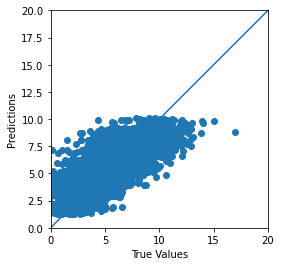

In [28]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, ])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

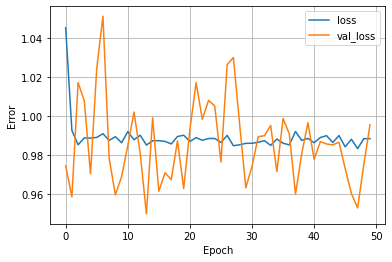

In [30]:
plot_loss(history)

In [83]:
raw_seda.describe()

,grade,year,gcs_mn_all,totgyb_all,gcs_mn_asn,gcs_mn_blk,gcs_mn_ecd,gcs_mn_fem,gcs_mn_hsp,gcs_mn_mal,...,gcs_mn_wht,pct_asn,pct_blk,pct_ecd,pct_fem,pct_hsp,pct_mal,pct_nam,pct_nec,pct_wht
count,1.295492e+06,1.295492e+06,1.128090e+06,1.295457e+06,122661.000000,253378.000000,866744.000000,936964.000000,321671.000000,951148.000000,...,1.002243e+06,470341.000000,631903.000000,1.228119e+06,1.262749e+06,875748.000000,1.262578e+06,325954.000000,1.203119e+06,1.243076e+06
mean,5.417719e+00,2.013285e+03,5.535573e+00,2.938719e+02,7.356901,3.981845,4.571984,5.794669,4.453603,5.364714,...,5.973581e+00,4.551446,14.322870,5.072932e+01,4.893838e+01,17.807345,5.155994e+01,10.441599,5.187628e+01,7.402137e+01
std,1.690447e+00,2.901202e+00,2.129036e+00,1.096299e+03,2.602862,1.903718,1.918947,2.191694,1.997384,2.129975,...,2.040896e+00,6.876704,20.863251,2.329377e+01,7.867739e+00,22.530984,7.993891e+00,20.741071,2.180823e+01,2.603471e+01
min,3.000000e+00,2.009000e+03,-6.843564e+00,1.000000e+00,-8.130462,-5.128465,-7.190243,-5.080266,-2.964123,-6.776538,...,-2.724427e+00,0.043290,0.026546,2.159827e-01,4.347826e+00,0.087260,2.000000e+00,0.021650,4.500450e-02,3.763171e-02
25%,4.000000e+00,2.011000e+03,3.954626e+00,3.700000e+01,5.495033,2.533019,3.112211,4.143421,2.941232,3.811453,...,4.415221e+00,1.176471,1.980198,3.383838e+01,4.556962e+01,3.350817,4.818182e+01,0.469216,3.619632e+01,6.023256e+01
50%,5.000000e+00,2.013000e+03,5.478162e+00,9.600000e+01,7.275638,3.935469,4.526082,5.728525,4.397138,5.305628,...,5.918612e+00,2.285714,5.000000,5.000000e+01,4.880174e+01,7.894737,5.127505e+01,1.298701,5.138889e+01,8.431373e+01
75%,7.000000e+00,2.016000e+03,7.089893e+00,2.430000e+02,9.137552,5.385304,6.018833,7.404844,5.937070,6.881923,...,7.485086e+00,4.927302,16.746411,6.666667e+01,5.194805e+01,22.323327,5.454545e+01,8.000000,6.746988e+01,9.393939e+01
max,8.000000e+00,2.018000e+03,1.933040e+01,7.697000e+04,21.347616,12.578522,13.804824,21.676637,13.684132,16.919633,...,1.687523e+01,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02
